## 生成分割数据
把除了人之外的物体和背景都当作背景

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
import sys
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
%pdb

Automatic pdb calling has been turned ON


### 打开标注数据

In [2]:
dataDir='..'
dataType='train2014'
# dataType='val2014'
if dataType =='test2014':
    annFile = '%s/annotations/image_info_%s.json'%(dataDir,dataType)
else:
    annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.65s)
creating index...
index created!


### 挑选含有人的图片

In [4]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
print '类别为人的图片数量为：%d'%len(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print img

类别为人的图片数量为：45174
{u'license': 3, u'file_name': u'COCO_train2014_000000253487.jpg', u'coco_url': u'http://mscoco.org/images/253487', u'height': 468, u'width': 640, u'date_captured': u'2013-11-17 04:10:24', u'flickr_url': u'http://farm3.staticflickr.com/2799/4500241232_f1f44c3bc0_z.jpg', u'id': 253487}


### 显示样例图片

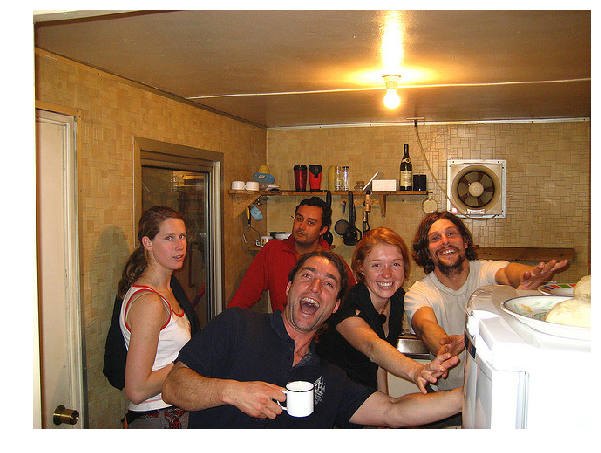

In [7]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
# I = io.imread('http://mscoco.org/images/%d'%(img['id']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

### 显示标注

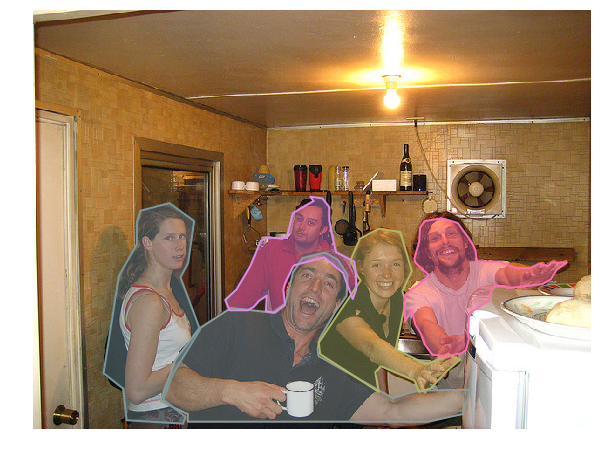

In [8]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [18]:
print len(anns)
print anns[0]

14
{u'segmentation': [[453.0, 292.1, 457.0, 253.1, 439.0, 245.1, 438.0, 215.1, 439.0, 198.1, 420.0, 223.1, 414.0, 233.1, 401.0, 227.1, 400.0, 226.1, 398.0, 229.1, 391.0, 231.1, 387.0, 213.1, 399.0, 203.1, 404.0, 200.1, 413.0, 194.1, 418.0, 186.1, 408.0, 181.1, 415.0, 154.1, 418.0, 142.1, 419.0, 127.1, 422.0, 125.1, 419.0, 120.1, 412.0, 122.1, 407.0, 112.1, 402.0, 105.1, 389.0, 113.1, 390.0, 105.1, 395.0, 100.1, 395.0, 97.1, 398.0, 83.1, 407.0, 72.1, 417.0, 71.1, 424.0, 72.1, 428.0, 73.1, 436.0, 80.1, 441.0, 90.1, 446.0, 96.1, 456.0, 101.1, 472.0, 110.1, 480.0, 113.1, 493.0, 123.1, 499.0, 136.1, 504.0, 147.1, 509.0, 167.1, 515.0, 182.1, 531.0, 205.1, 532.0, 218.1, 525.0, 229.1, 514.0, 246.1, 499.0, 283.1, 499.0, 307.1, 499.0, 323.1, 499.0, 343.1, 505.0, 367.1, 505.0, 380.1, 505.0, 381.1, 486.0, 387.1, 482.0, 392.1, 479.0, 393.1, 469.0, 363.1, 453.0, 343.1, 451.0, 339.1, 454.0, 321.1, 453.0, 312.1, 460.0, 313.1, 458.0, 298.1, 452.0, 293.1]], u'area': 21258.0, u'iscrowd': 0, u'image_id': 

In [20]:
from pycocotools.mask import decode,encode

In [28]:
encode(anns[0]['segmentation'])

AttributeError: 'list' object has no attribute 'shape'

> /home/wangjundong/Projects/coco/PythonAPI/pycocotools/mask.py(81)encode()
     79 
     80 def encode(bimask):
---> 81     if len(bimask.shape) == 3:
     82         return _mask.encode(bimask)
     83     elif len(bimask.shape) == 2:

ipdb> q


### 保存包含人的图片

In [16]:
# 是否显示图片和标注
show_image = False

# 遍历包含人的图片
for image_count, image_id in enumerate(imgIds):
    sys.stderr.write('\r第%d张图片： image id: %d'%(image_count,image_id))
    img = coco.loadImgs(image_id)[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
#     io.imsave(
#         '%s/images_processed/images/%s'%(dataDir,img['file_name']),
#         I
#     )
    if show_image:
        plt.figure(); plt.axis('off')
        plt.imshow(I)
        coco.showAnns(anns)
# 所有物体的masks，初始为全0    
    masks = np.zeros(I.shape[:2])
    for ann_count,ann in enumerate(anns):
        mask = coco.annToMask(ann)
        masks += mask
# 0-1图片
    masks = masks>0
# 绘制0-1 mask
    if show_image:
        plt.figure(); plt.axis('off')
        plt.imshow(masks,cmap=plt.cm.gray)
    np.savetxt(open('%s/images_processed/masks/%s.txt'%(dataDir,img['file_name']),'w'),masks,fmt='%d',delimiter=',')

第9张图片： image id: 262136